In [7]:
import pandas as pd
from datetime import datetime, date


In [28]:
raw_dataset = pd.read_csv('./DATASET/Flights.csv', parse_dates=['FL_DATE'], low_memory=False).rename(columns=str.lower)

In [29]:
raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450017 entries, 0 to 450016
Data columns (total 33 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   fl_date                450017 non-null  datetime64[ns]
 1   unique_carrier         450017 non-null  object        
 2   airline_id             450017 non-null  int64         
 3   tail_num               449378 non-null  object        
 4   fl_num                 450017 non-null  int64         
 5   origin_airport_id      450017 non-null  int64         
 6   origin_airport_seq_id  450017 non-null  int64         
 7   origin_city_market_id  450017 non-null  int64         
 8   origin                 450017 non-null  object        
 9   origin_city_name       450017 non-null  object        
 10  dest_airport_id        450017 non-null  int64         
 11  dest_airport_seq_id    450017 non-null  int64         
 12  dest_city_market_id    450017 non-null  int6

In [30]:
raw_dataset.describe()

,airline_id,fl_num,origin_airport_id,origin_airport_seq_id,origin_city_market_id,dest_airport_id,dest_airport_seq_id,dest_city_market_id,crs_dep_time,dep_time,...,crs_arr_time,arr_time,arr_delay,cancelled,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,unnamed: 32
count,450017.000000,450017.000000,450017.000000,4.500170e+05,450017.000000,450017.000000,4.500170e+05,450017.000000,450017.000000,441476.000000,...,450017.000000,440746.000000,439645.000000,450017.000000,97699.000000,97699.000000,97699.000000,97699.000000,97699.000000,0.0
mean,19900.483275,2079.643193,12698.267568,1.269830e+06,31738.603264,12698.024626,1.269805e+06,31738.404640,1327.757407,1333.947392,...,1506.278285,1487.332958,6.954484,0.019746,20.308836,3.368857,15.742495,0.079745,24.947492,NaN
std,385.381448,1722.700045,1534.326936,1.534324e+05,1286.063689,1534.246611,1.534244e+05,1285.791081,481.548320,494.957196,...,501.853851,523.821795,49.595992,0.139126,60.649157,27.809756,32.328181,2.896287,47.850860,NaN
min,19393.000000,1.000000,10135.000000,1.013503e+06,30070.000000,10135.000000,1.013503e+06,30070.000000,5.000000,1.000000,...,1.000000,1.000000,-98.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,19690.000000,679.000000,11292.000000,1.129202e+06,30647.000000,11292.000000,1.129202e+06,30647.000000,917.000000,921.000000,...,1120.000000,1108.000000,-15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,19805.000000,1602.000000,12892.000000,1.289204e+06,31454.000000,12892.000000,1.289204e+06,31454.000000,1321.000000,1330.000000,...,1529.000000,1521.000000,-5.000000,0.000000,0.000000,0.000000,4.000000,0.000000,3.000000,NaN
75%,20304.000000,3034.000000,14057.000000,1.405702e+06,32467.000000,14057.000000,1.405702e+06,32467.000000,1730.000000,1738.000000,...,1921.000000,1921.000000,11.000000,0.000000,17.000000,0.000000,20.000000,0.000000,31.000000,NaN
max,21171.000000,7439.000000,16218.000000,1.621801e+06,35991.000000,16218.000000,1.621801e+06,35991.000000,2359.000000,2400.000000,...,2359.000000,2400.000000,1944.000000,1.000000,1934.000000,1934.000000,1457.000000,653.000000,1392.000000,NaN


In [31]:
raw_dataset.nunique()

fl_date                    31
unique_carrier             12
airline_id                 12
tail_num                 4390
fl_num                   6393
origin_airport_id         298
origin_airport_seq_id     298
origin_city_market_id     277
origin                    298
origin_city_name          294
dest_airport_id           297
dest_airport_seq_id       297
dest_city_market_id       276
dest                      297
dest_city_name            293
crs_dep_time             1186
dep_time                 1427
dep_delay                 896
taxi_out                  165
wheels_off               1429
wheels_on                1440
taxi_in                   168
crs_arr_time             1323
arr_time                 1440
arr_delay                 893
cancelled                   2
cancellation_code           4
carrier_delay             683
weather_delay             392
nas_delay                 383
security_delay             71
late_aircraft_delay       471
unnamed: 32                 0
dtype: int

In [38]:
print(raw_dataset.fl_date.min(),'\n',raw_dataset.fl_date.max())

2017-01-01 00:00:00 
 2017-01-31 00:00:00


In [40]:
raw_dataset = raw_dataset.drop('unnamed: 32', axis=1)

In [42]:
#2.3
raw_dataset = raw_dataset[raw_dataset.cancelled == 0]

450017
441131


In [45]:
distinct_airports = pd.concat([raw_dataset["origin"], raw_dataset["dest"]])
print(f"First ten airports: {distinct_airports.unique()[:10]}. Size: {distinct_airports.unique().size}")

In [59]:
#2.4
ds_by_carrier = raw_dataset.groupby('unique_carrier')
ds_by_carrier.fl_date.count()

unique_carrier
AA     72152
AS     14454
B6     24077
DL     69031
EV     33878
F9      7598
HA      6258
NK     12129
OO     48266
UA     42171
VX      5645
WN    105472
Name: fl_date, dtype: int64

In [71]:
def get_cols():
    return ['dep_delay', 'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay']

mean_carriers = ds_by_carrier[get_cols()].mean()
mean_carriers

,dep_delay,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
unique_carrier,,,,,,,
AA,7.466917,3.307004,18.736410,2.352168,15.370026,0.178156,18.742267
AS,5.220769,3.311553,11.736505,3.820850,18.615047,0.169028,19.189946
B6,14.132533,8.423231,20.297641,1.436562,15.223725,0.312820,29.282627
DL,13.512205,4.305279,30.858959,9.572160,16.836252,0.033901,21.964020
EV,17.687791,13.173011,36.329407,1.368504,15.794439,0.000000,31.725109
F9,16.566333,12.076791,16.748299,0.870295,19.070295,0.000000,31.091610
HA,2.916427,3.617181,29.941714,0.897143,0.251429,0.122286,14.113143
NK,11.680600,8.993642,9.080825,0.732499,43.840041,0.035171,12.137978
OO,15.194941,12.528524,23.495640,4.633053,15.186582,0.100759,31.316244


In [70]:
mean_carriers.mean(axis=1)

unique_carrier
AA     9.450421
AS     8.866243
B6    12.729877
DL    13.868968
EV    16.582609
F9    13.774803
HA     7.408475
NK    12.357251
OO    14.636535
UA    12.618013
VX    13.694423
WN     9.576127
dtype: float64

In [72]:
raw_dataset['week_day'] = raw_dataset.fl_date.dt.dayofweek

In [73]:
raw_dataset['delta_delay'] = raw_dataset['arr_delay'] - raw_dataset['dep_delay']
raw_dataset.delta_delay.head()

0    -4.0
1     8.0
2    -9.0
3    20.0
4    42.0
Name: delta_delay, dtype: float64

<AxesSubplot:title={'center':'arr_delay'}, xlabel='week_day'>

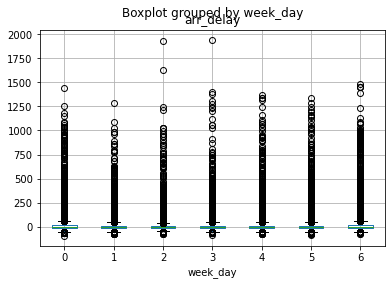

In [74]:
raw_dataset.boxplot(by='week_day', column='arr_delay')

<AxesSubplot:title={'center':'arr_delay'}, xlabel='week_day'>

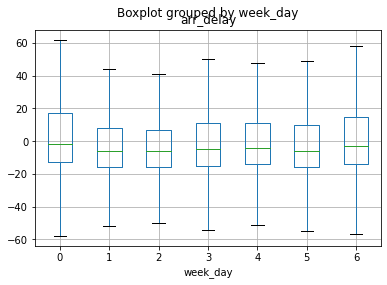

In [78]:
raw_dataset.boxplot(by='week_day', column='arr_delay', showfliers=False)